This file collects and compares data of 5 main macroeconomic indicators of China and visualizes these comparisons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd
import jqdatasdk
from jqdatasdk import macro
from jqdatasdk import *
jqdatasdk.auth("18639879991","Mzy1208@3")

auth success 


In [2]:
import tushare as ts
token = '4196331e3591ec2e7c5ed2b83235e3aedd5c2b17cf6c802d58074450'
pro = ts.pro_api(token)
from pylab import mpl

In [3]:
import datetime

In [4]:
#set parameters of the plot
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## Define functions to get data from joinquant

In [13]:
def get_data_from_jqapi(table,time): 
    q = query(table)
    df = macro.run_query(q)
    df[time]=pd.to_datetime(df[time],format='%Y-%m').dt.date
    df = df.sort_values(by=time).reset_index()
    df = df.fillna(0)
    print(df)
    return df
def get_dictionary(df,meaning):
    columns = df.columns.values[3:]
    dic = {key:value for key,value in zip(meaning,columns)}
    return dic

## Get CPI

In [14]:
#CPI
df_MAC_CPI_MONTH1= get_data_from_jqapi(macro.MAC_CPI_MONTH,'stat_month')
df_MAC_CPI_MONTH=df_MAC_CPI_MONTH1.loc[df_MAC_CPI_MONTH1['area_name'].str.contains('全国')]
df_MAC_CPI_MONTH.index = range(len(df_MAC_CPI_MONTH))
meaning_MAC_CPI_MONTH = ['统计范围代码','统计范围','当月CPI',
                        '同比','环比','当年度累计']
dic_MAC_CPI_MONTH = get_dictionary(df_MAC_CPI_MONTH,meaning_MAC_CPI_MONTH)
df_MAC_CPI_MONTH1=df_MAC_CPI_MONTH.set_index('stat_month')
CPI_yoy_acc=df_MAC_CPI_MONTH1.loc[:,['yoy']]*100
CPI_acc=df_MAC_CPI_MONTH1.loc[:,['acc']]

     index     id  stat_month area_code area_name cpi_month    yoy    mom  \
0      410    411  2008-01-01    701003        农村     107.7  0.077  0.012   
1      409    410  2008-01-01    701002        城市     106.8  0.068  0.012   
2      408    409  2008-01-01    701001        全国     107.1  0.071  0.012   
3      407    408  2008-02-01    701003        农村     109.2  0.092  0.024   
4      406    407  2008-02-01    701002        城市     108.5  0.085  0.027   
..     ...    ...         ...       ...       ...       ...    ...    ...   
484    484  36581  2021-06-01    701002        城市     101.2  0.012 -0.004   
485    485  36582  2021-06-01    701003        农村     100.7  0.007 -0.005   
486    487  38441  2021-07-01    701002        城市     101.2  0.012  0.003   
487    486  38440  2021-07-01    701001        全国       101  0.010  0.003   
488    488  38442  2021-07-01    701003        农村     100.4  0.004  0.002   

       acc  
0    107.7  
1    106.8  
2    107.1  
3    108.5  
4    107.6

## Get PMI

In [15]:
#PMI
df_MAC_MANUFACTURING_PMI = get_data_from_jqapi(macro.MAC_MANUFACTURING_PMI,'stat_month')
meaning_MAC_MANUFACTURING_PMI = ['制造业采购经理指数','生产指数','新订单指数',
                                '新出口订单指数','在手订单指数','产成品库存指数',
                                '采购量指数','进口指数','出厂价格指数',
                                '主要原材料购进价格指数','原材料库存指数','从业人员指数',
                                '供应商配送时间指数','生产经营活动预期指数']
dic_MAC_MANUFACTURING_PMI = get_dictionary(df_MAC_MANUFACTURING_PMI,meaning_MAC_MANUFACTURING_PMI)
df_MAC_MANUFACTURING_PMI1=df_MAC_MANUFACTURING_PMI.set_index('stat_month')
PMI_acc=df_MAC_MANUFACTURING_PMI1.loc[:,['pmi']]

     index   id  stat_month   pmi  produce_idx  new_orders_idx  \
0      101  407  2005-01-01  54.7         57.6            60.7   
1      100  406  2005-02-01  54.5         55.6            61.5   
2       99  405  2005-03-01  57.9         65.2            63.5   
3      105  411  2005-04-01  56.7         62.7            61.3   
4      104  410  2005-05-01  52.9         57.0            55.6   
..     ...  ...         ...   ...          ...             ...   
194    194  513  2021-03-01  51.9         53.9            53.6   
195    195  514  2021-04-01  51.1         52.2            52.0   
196    196  515  2021-05-01  51.0         52.7            51.3   
197    197  517  2021-06-01  50.9         51.9            51.5   
198    198  518  2021-07-01  50.4         51.0            50.9   

     new_export_orders_idx  order_in_hand_idx  finished_produce_idx  \
0                     58.3               46.6                  46.6   
1                     59.9               49.8                  47

## Get GDP

In [16]:
#GDP
df_MAC_AREA_GDP_QUARTER = get_data_from_jqapi(macro.MAC_AREA_GDP_QUARTER,'stat_quarter')
meaning_MAC_AREA_GDP_QUARTER = ['地区代码','地区名称','国内生产总值(累计值)',
                               '国内生产总值-第一产业(累计值)','国内生产总值-第二产业(累计值)','国内生产总值-第三产业(累计值)',
                               '国内生产总值(当前值)','国内生产总值-第一产业(当季值)','国内生产总值-第二产业(当季值)',
                               '国内生产总值-第三产业(当季值)','国内生产总值同比(累计值)','国内生产总值同比-第一产业(累计值)',
                               '国内生产总值同比-第二产业(累计值)','国内生产总值同比-第三产业(累计值)','国内生产总值同比(当季值)',
                               '国内生产总值同比-第一产业(当季值)','国内生产总值同比-第二产业(当季值)','国内生产总值同比-第三产业(当季值)',
                               '国内生产总值环比']
dic_MAC_AREA_GDP_QUARTER = get_dictionary(df_MAC_AREA_GDP_QUARTER,meaning_MAC_AREA_GDP_QUARTER)
df_MAC_AREA_GDP_QUARTER = df_MAC_AREA_GDP_QUARTER.loc[df_MAC_AREA_GDP_QUARTER['area_name']=='中国']
df_MAC_AREA_GDP_QUARTER=df_MAC_AREA_GDP_QUARTER.iloc[64:,:]
df_MAC_AREA_GDP_QUARTER1=df_MAC_AREA_GDP_QUARTER.set_index('stat_quarter')
GDP_yoy_acc=df_MAC_AREA_GDP_QUARTER1.loc[:,['gdp_yoy_acc']]
GDP_yoy_acc=GDP_yoy_acc['gdp_yoy_acc'].add(-100)
GDP_yoy_sin=(df_MAC_AREA_GDP_QUARTER1.loc[:,['gdp_yoy_sin']].add(-100))
GDP_primary_yoy_sin=(df_MAC_AREA_GDP_QUARTER1.loc[:,['gdp_primary_yoy_sin']].add(-100))
GDP_secondary_yoy_sin=(df_MAC_AREA_GDP_QUARTER1.loc[:,['gdp_secondary_yoy_sin']].add(-100))
GDP_tertiary_yoy_sin=(df_MAC_AREA_GDP_QUARTER1.loc[:,['gdp_tertiary_yoy_sin']].add(-100))

      index    id stat_quarter area_code area_name    gdp_acc  \
0       246   266   1992-03-01       156        中国    5262.80   
1       245   265   1992-06-01       156        中国   11747.10   
2       244   264   1992-09-01       156        中国   18939.80   
3       256   279   1992-12-01       156        中国   27194.50   
4       258   281   1993-03-01       156        中国    6834.60   
...     ...   ...          ...       ...       ...        ...   
2179   2153  3654   2021-06-01    520000       贵州省    9075.47   
2180   2152  3653   2021-06-01    350000       福建省   22913.86   
2181   2182  3683   2021-06-01    420000       湖北省   22777.69   
2182   2166  3667   2021-06-01    430000       湖南省   21666.50   
2183   2183  3691   2021-06-01       156        中国  532167.50   

      gdp_primary_acc  gdp_secondary_acc  gdp_tertiary_acc   gdp_sin  ...  \
0               649.3             2400.8            2212.7    5262.8  ...   
1              1907.2             5199.9            4640.0    648

# Get data from tushare

## Get PPI

In [17]:
df = pro.cn_ppi(start_m='200501')
#获取指定字段
df_PPI = pro.cn_ppi(start_m='200505',fields='month,ppi_yoy,ppi_mom,ppi_accu')
df_PPI['month']=pd.to_datetime(df['month'],format='%Y%m').dt.date
df_PPI=df_PPI.sort_values(by='month').reset_index()
df_PPI= df_PPI.fillna(0)
df_PPI1=df_PPI.set_index('month')
PPI_yoy_acc=df_PPI1.loc[:,['ppi_yoy']]
PPI_yoy_acc

,ppi_yoy
month,
2005-05-01,5.90
2005-06-01,5.24
2005-07-01,5.19
2005-08-01,5.26
2005-09-01,4.50
...,...
2021-03-01,4.40
2021-04-01,6.80
2021-05-01,9.00


## Get M2

In [18]:
df= pro.cn_m(start_m='200501')
df_M2= pro.cn_m(start_m='200501', fields='month,m2,m2_yoy')
df_M2['month']=pd.to_datetime(df_M2['month'],format='%Y%m').dt.date
df_M2=df_M2.sort_values(by='month').reset_index()
df_M2= df_M2.fillna(0)
df_M21=df_M2.set_index('month')
M2_yoy_acc=df_M21.loc[:,['m2_yoy']]
M2_yoy_acc

,m2_yoy
month,
2005-01-01,14.50
2005-02-01,14.23
2005-03-01,14.22
2005-04-01,14.28
2005-05-01,14.64
...,...
2021-03-01,9.40
2021-04-01,8.10
2021-05-01,8.30


## Comparison of macroeconomic indicators

## CPI(year-on-year) VS GDP(year-on-year)

In [21]:
def CPI_VS_GDP(start_year,start_quarter,end_year,end_quarter):
    
    # 构建CPI_GDP
    CPI_GDP=pd.concat([CPI_yoy_acc,GDP_yoy_acc],axis=1)
    CPI_GDP=CPI_GDP.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    CPI_GDP.columns = ['cpi_yoy','gdp_yoy']
    fig = plt.figure(figsize=(10,6))
    
    # 确定开始时间对应index
    start_time=datetime.date(start_year,3*start_quarter,1)
    n1=0
    for i in range(0,len(CPI_GDP.index)):
        if CPI_GDP.index[i]==start_time:
            n1=i
        else:
            n1=n1
    
    # 确定结束时间对应index
    n2=0
    if end_year=='latest':
        CPI_GDP=CPI_GDP.iloc[n1:,:]
    else:
        end_time=datetime.date(end_year,3*(end_quarter),1)
        for i in range(0,len(CPI_GDP.index)):
            if CPI_GDP.index[i]==end_time:
                n2=i
            else:
                n2=n2
        CPI_GDP=CPI_GDP.iloc[n1:n2+1,:]
        
    plt.plot(CPI_GDP.cpi_yoy,'b',linestyle="-",label="CPI当月同比")
    plt.plot(CPI_GDP.gdp_yoy,'r',linestyle="--",label="GDP当季同比（只关注3,6,9,12月份）同比")
    plt.legend()
    plt.grid()
    plt.title("CPI同比vsGDP同比")
    plt.xlabel(u"年份/年")
    plt.ylabel(u"同比/%")
    plt.show()
    return plt.show()

## CPI(year-on-year) VS PPI(year-on-year)

In [22]:
def CPI_VS_PPI(start_year,start_month,end_year,end_month):
    
    # 构建CPI_PPI    
    CPI_PPI=pd.concat([CPI_yoy_acc,PPI_yoy_acc],axis=1)
    CPI_PPI=CPI_PPI.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    CPI_PPI.columns = ['cpi_yoy','ppi_yoy']
    fig = plt.figure(figsize=(10,6))
    
    # 确定开始时间对应index
    start_time=datetime.date(start_year,start_month,1)
    n1=0
    for i in range(0,len(CPI_PPI.index)):
        if CPI_PPI.index[i]==start_time:
            n1=i
        else:
            n1=n1
    
    # 确定结束时间对应index
    n2=0
    if end_year=='latest':
        CPI_PPI=CPI_PPI.iloc[n1:,:]
    else:
        end_time=datetime.date(end_year,end_month,1)
        for i in range(0,len(CPI_PPI.index)):
            if CPI_PPI.index[i]==end_time:
                n2=i
            else:
                n2=n2
        CPI_PPI=CPI_PPI.iloc[n1:n2+1,:]
    
    # 画图
    plt.plot(CPI_PPI.cpi_yoy,'b',linestyle="-",label="CPI当月同比")
    plt.plot(CPI_PPI.ppi_yoy,'r',linestyle="--",label="PPI当月同比")
    plt.legend()
    plt.grid()
    plt.title("CPI同比vsPPI同比")
    plt.xlabel(u"年份/年")
    plt.ylabel(u"同比/%")
    plt.show()
    return plt.show()

## CPI(year-on-year) VS PMI(absolute value)

In [23]:
def CPI_VS_PMI(start_year,start_month,end_year,end_month):
    
    # 构建CPI_PMI
    CPI_PMI=pd.concat([CPI_yoy_acc,PMI_acc],axis=1)
    CPI_PMI=CPI_PMI.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    CPI_PMI.columns = ['cpi_yoy_acc','pmi_acc']
    fig = plt.figure(figsize=(10,6))
    
    # 确定开始时间对应index
    start_time=datetime.date(start_year,start_month,1)
    n1=0
    for i in range(0,len(CPI_PMI.index)):
        if CPI_PMI.index[i]==start_time:
            n1=i
        else:
            n1=n1
    
    # 确定结束时间对应index
    n2=0
    if end_year=='latest':
        CPI_PMI=CPI_PMI.iloc[n1:,:]
    else:
        end_time=datetime.date(end_year,end_month,1)
        for i in range(0,len(CPI_PMI.index)):
            if CPI_PMI.index[i]==end_time:
                n2=i
            else:
                n2=n2
        CPI_PMI=CPI_PMI.iloc[n1:n2+1,:]
    
    # 画图
    ax1 = fig.add_subplot(111)
    ax1.plot(CPI_PMI.cpi_yoy_acc,'b',linestyle="-",label="CPI当月同比")
    ax1.set_ylabel(u"CPI同比/%")
    plt.title("CPI同比vsPMI绝对值")
    plt.grid()
    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(CPI_PMI.pmi_acc,'r',linestyle="--",label="PMI绝对值")
    ax2.set_ylabel(u"PMI绝对值")
    ax2.set_xlabel('Same')
    fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    plt.xlabel(u"年份/年")
    plt.show()
    return plt.show()

## CPI(year-on-year) VS M2(year-on-year)

In [24]:
def CPI_VS_M2(start_year,start_month,end_year,end_month):
    
    # 构建CPI_M2
    CPI_M2=pd.concat([CPI_yoy_acc,M2_yoy_acc],axis=1)
    CPI_M2=CPI_M2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    CPI_M2.columns = ['cpi_yoy_acc','m2_yoy']
    fig = plt.figure(figsize=(10,6))
    
    # 确定开始时间对应index
    start_time=datetime.date(start_year,start_month,1)
    n1=0
    for i in range(0,len(CPI_M2.index)):
        if CPI_M2.index[i]==start_time:
            n1=i
        else:
            n1=n1
    
    # 确定结束时间对应index
    n2=0
    if end_year=='latest':
        CPI_M2=CPI_M2.iloc[n1:,:]
    else:
        end_time=datetime.date(end_year,end_month,1)
        for i in range(0,len(CPI_M2.index)):
            if CPI_M2.index[i]==end_time:
                n2=i
            else:
                n2=n2
        CPI_M2=CPI_M2.iloc[n1:n2+1,:]
    
    # 画图
    ax1 = fig.add_subplot(111)
    ax1.plot(CPI_M2.cpi_yoy_acc,'b',linestyle="-",label="CPI当月同比")
    ax1.set_ylabel(u"CPI同比/%")
    plt.title("CPI同比vsM2同比")
    plt.grid()
    ax2 = ax1.twinx()  # this is the important function
    ax2.plot(CPI_M2.m2_yoy,'r',linestyle="--",label="M2同比")
    ax2.set_ylabel(u"M2当月同比")
    ax2.set_xlabel('Same')
    fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
    plt.xlabel(u"年份/年")
    plt.show()
    return plt.show()

# Visualization of comparison

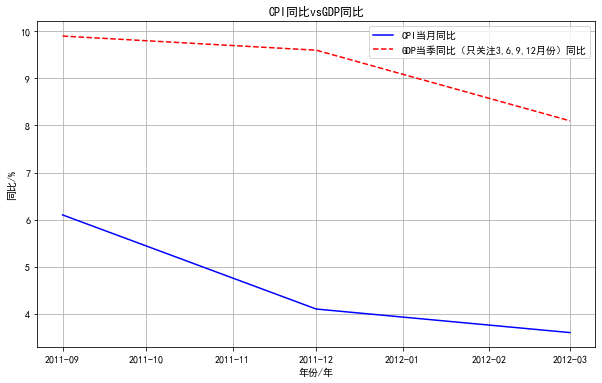

In [26]:
# 2011 3rd quarter to 2012 1st quarter
CPI_VS_GDP(2011,3,2012,1)

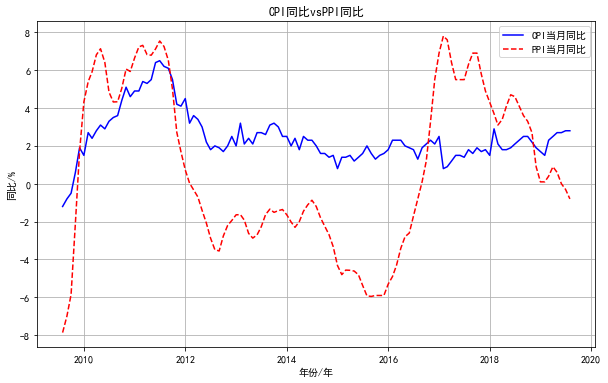

In [27]:
# 2014-01-01 to 2015-04-01
CPI_VS_PPI(2009,8,2019,8)

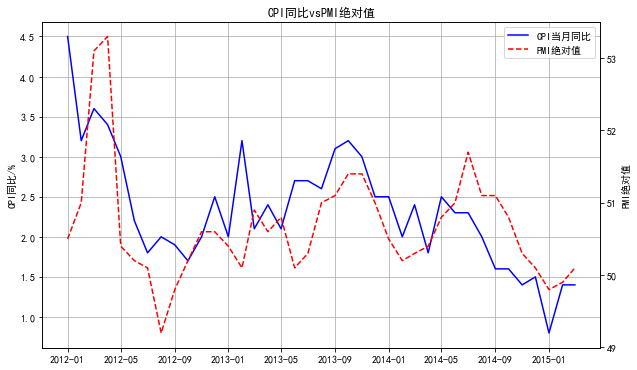

In [28]:
# 2012-01-01 to 2015-03-01
CPI_VS_PMI(2012,1,2015,3)

In [ ]:
#log out the joinquant account
logout()